In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# GNOD Music recomender project

###  1. Scraping webs to check current top 100 songs

In [2]:
#fetching the webpage
url = 'http://www.popvortex.com/music/charts/top-100-songs.php'
response = requests.get(url)
html_content = response.content

In [3]:
#parsing
soup = BeautifulSoup(html_content, 'html.parser')

In [4]:
print (soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   iTunes Top 100 Songs Chart 2023
  </title>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="iTunes top 100 songs chart list. The most popular hit music and trending songs of 2023. Chart of today's current iTunes top 100 songs is updated daily." name="description"/>
  <meta content="iTunes Top 100 Songs Chart 2023" property="og:title">
   <meta content="Chart of the top 100 songs on iTunes. Chart list of the top 100 song downloads of 2023 is updated daily." property="og:description">
    <meta content="article" property="og:type">
     <meta content="https://www.popvortex.com/images/logo-facebook.png" property="og:image"/>
     <meta content="PopVortex" property="og:site_name"/>
     <meta content="https://www.popvortex.com/music/charts/top-100-songs.php" property="og:url"/>
     <meta content="100000239962942" property="fb:admins"/>
     <meta content="178831188827052

In [5]:
#scraping artist and song elements
songs = soup.find_all('cite', class_='title')
artists = soup.find_all('em', class_='artist')

In [6]:
#extracting the text
song_titles = [song.get_text() for song in songs]
artist_names = [artist.get_text() for artist in artists]

In [7]:
#putting it into a dataframe
top100 = pd.DataFrame({
    'Song': song_titles,
    'Artist': artist_names
})
top100

Song                         Artist
0   3D (Justin Timberlake Remix)  Jung Kook & Justin Timberlake
1                  Lil Boo Thang                   Paul Russell
2                    Lovin On Me                    Jack Harlow
3       DJ Play A Christmas Song                           Cher
4                     Wrap Me Up  Jimmy Fallon & Meghan Trainor
..                           ...                            ...
95     Evil Ways (feat. J. Cole)                          Drake
96                    Dirt Cheap                   Cody Johnson
97                   Agora Hills                       Doja Cat
98                 World on Fire                     Nate Smith
99                Thank God I Do                  Lauren Daigle

[100 rows x 2 columns]

In [8]:
#second list
url = 'https://www.billboard.com/charts/hot-100/'
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <!-- Add to home screen for iOS -->
   <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
   <link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
   <!-- Tile icons for Windows -->
   <meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
   <meta content="https://www.billboard.com/wp
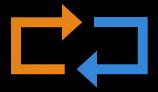

In [9]:
print(soup.prettify())

In [10]:
chart_entries = soup.find_all('li', class_='o-chart-results-list__item')
song_titles = []
artist_names = []
for entry in chart_entries:
    title_tag = entry.find('h3', class_='c-title')
    artist_tag = entry.find('span', class_='c-label')
    if title_tag and artist_tag:
        song_titles.append(title_tag.get_text(strip=True))
        artist_names.append(artist_tag.get_text(strip=True))

In [11]:
print(artist_names)

['Taylor Swift', 'Jack Harlow', 'Doja Cat', 'SZA', 'Taylor Swift', 'Zach Bryan Featuring Kacey Musgraves', 'Luke Combs', 'Tate McRae', 'Morgan Wallen', 'Morgan Wallen', 'Dua Lipa', 'Chris Stapleton', 'Jelly Roll', 'Doja Cat', 'Tyla', 'Drake Featuring Sexyy Red & SZA', 'Mariah Carey', 'Gunna', 'Jelly Roll With Lainey Wilson', 'Dua Lipa', 'Olivia Rodrigo', 'Miley Cyrus', 'Paul Russell', 'Bad Bunny', 'Drake Featuring J. Cole', 'Drake Featuring Yeat', 'Billie Eilish', 'Usher, Summer Walker & 21 Savage', 'Miley Cyrus', 'Mitski', 'Noah Kahan', 'Wham!', 'Taylor Swift', 'Noah Kahan With Post Malone', 'Doechii Featuring Kodak Black', 'SZA', 'Noah Kahan With Hozier', 'Bobby Helms', 'Teddy Swims', 'Fuerza Regida & Marshmello', 'David Kushner', 'Travis Scott', 'Jessie Murph & Jelly Roll', 'Burl Ives', 'Nicki Minaj & Ice Spice With Aqua', 'Warren Zeiders', 'Nate Smith', 'Victoria Monet', 'Taylor Swift', 'Jung Kook', 'Lil Tecca', 'Kenya Grace', 'Taylor Swift', 'Olivia Rodrigo', 'Rod Wave', 'Olivia R

In [12]:
# Creating a DataFrame
billboard100 = pd.DataFrame({
    'Song': song_titles,
    'Artist': artist_names
})
billboard100

Song  \
0                                        Cruel Summer   
1                                         Lovin On Me   
2                                  Paint The Town Red   
3                                              Snooze   
4   Is It Over Now? (Taylor's Version) [From The V...   
..                                                ...   
95                                  Mi Ex Tenia Razon   
96                              Different 'Round Here   
97                        But I Got A Beer In My Hand   
98                                   Better Than Ever   
99                                  Soak City (Do It)   

                                   Artist  
0                            Taylor Swift  
1                             Jack Harlow  
2                                Doja Cat  
3                                     SZA  
4                            Taylor Swift  
..                                    ...  
95                                Karol G  
96       Riley Green Featuring Luke Combs  
97                             Luke Bryan  
98  YoungBoy Never Broke Again & Rod Wave  
99                               310babii  

[100 rows x 2 columns]

#### Check if your song is currently "hot"

In [13]:
import random
#Hot song recommendation function
def recommend_song(user_input, top100, billboard100):
    combined_df = pd.concat([top100, billboard100], ignore_index=True)
    combined_df = combined_df.drop_duplicates(subset='Song')

    if user_input in combined_df['Song'].values:
        recommendation = combined_df[combined_df['Song'] != user_input].sample(n=1)
        song = recommendation.iloc[0]['Song']
        artist = recommendation.iloc[0]['Artist']
        return f"Try listening to '{song}' by {artist}!"
    else:
        return "We have no recommendation at this time."


In [14]:
user_song_input = 'I will Survive'
print(recommend_song(user_song_input, top100, billboard100))


We have no recommendation at this time.


   
 ### 2. API WRAPPER: spotify

In [15]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from pandas import json_normalize
from random import randint
from time import sleep

In [16]:
# Function to read secrets from the file
def get_secrets(filename="secrets.txt"):
    secrets_dict = {}
    with open(filename, "r") as file:
        lines = file.readlines()
        for line in lines:
            if line.strip():
                key, value = line.strip().split(':')
                secrets_dict[key] = value
    return secrets_dict

# Retrieve secrets
secrets = get_secrets()

In [17]:
# Spotify API credentials
client_id = secrets['client_id']
client_secret = secrets['client_secret']

# Spotify API authentication
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [18]:
# Function to get all tracks from a playlist
def get_playlist_tracks(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks += results['items']
        sleep(randint(1,3000)/1000)  # Respectful nap
    return tracks

In [19]:
all_tracks = get_playlist_tracks("1TcVLQhUpkqptGXZPPpXlR")
len(all_tracks)

10000

In [20]:
tracks2 = json_normalize(all_tracks)

In [21]:
tracks2

added_at  is_local primary_color  \
0     2017-05-15T05:22:09Z     False          None   
1     2017-05-15T05:22:45Z     False          None   
2     2017-05-15T05:30:27Z     False          None   
3     2017-05-15T05:31:27Z     False          None   
4     2017-05-15T05:30:07Z     False          None   
...                    ...       ...           ...   
9995  2023-11-11T15:28:05Z     False          None   
9996  2023-11-11T15:28:12Z     False          None   
9997  2023-11-11T15:29:42Z     False          None   
9998  2023-11-11T15:29:49Z     False          None   
9999  2023-11-11T15:30:07Z     False          None   

                added_by.external_urls.spotify  \
0     https://open.spotify.com/user/1267536257   
1     https://open.spotify.com/user/1267536257   
2     https://open.spotify.com/user/1267536257   
3     https://open.spotify.com/user/1267536257   
4     https://open.spotify.com/user/1267536257   
...                                        ...   
9995  https://open.spotify.com/user/1267536257   
9996  https://open.spotify.com/user/1267536257   
9997  https://open.spotify.com/user/1267536257   
9998  https://open.spotify.com/user/1267536257   
9999  https://open.spotify.com/user/1267536257   

                                    added_by.href added_by.id added_by.type  \
0     https://api.spotify.com/v1/users/1267536257  1267536257          user   
1     https://api.spotify.com/v1/users/1267536257  1267536257          user   
2     https://api.spotify.com/v1/users/1267536257  1267536257          user   
3     https://api.spotify.com/v1/users/1267536257  1267536257          user   
4     https://api.spotify.com/v1/users/1267536257  1267536257          user   
...                                           ...         ...           ...   
9995  https://api.spotify.com/v1/users/1267536257  1267536257          user   
9996  https://api.spotify.com/v1/users/1267536257  1267536257          user   
9997  https://api.spotify.com/v1/users/1267536257  1267536257          user   
9998  https://api.spotify.com/v1/users/1267536257  1267536257          user   
9999  https://api.spotify.com/v1/users/1267536257  1267536257          user   

                 added_by.uri track.album.album_type  \
0     spotify:user:1267536257                  album   
1     spotify:user:1267536257                  album   
2     spotify:user:1267536257                  album   
3     spotify:user:1267536257                  album   
4     spotify:user:1267536257                  album   
...                       ...                    ...   
9995  spotify:user:1267536257                  album   
9996  spotify:user:1267536257                  album   
9997  spotify:user:1267536257                  album   
9998  spotify:user:1267536257                  album   
9999  spotify:user:1267536257                  album   

                                    track.album.artists  ...  \
0     [{'external_urls': {'spotify': 'https://open.s...  ...   
1     [{'external_urls': {'spotify': 'https://open.s...  ...   
2     [{'external_urls': {'spotify': 'https://open.s...  ...   
3     [{'external_urls': {'spotify': 'https://open.s...  ...   
4     [{'external_urls': {'spotify': 'https://open.s...  ...   
...                                                 ...  ...   
9995  [{'external_urls': {'spotify': 'https://open.s...  ...   
9996  [{'external_urls': {'spotify': 'https://open.s...  ...   
9997  [{'external_urls': {'spotify': 'https://open.s...  ...   
9998  [{'external_urls': {'spotify': 'https://open.s...  ...   
9999  [{'external_urls': {'spotify': 'https://open.s...  ...   

                    track.id track.is_local  \
0     2EnRJ8kjTFpEZZWwbTNKZM          False   
1     4vdIA5CJLRcL6qaUY2BUCd          False   
2     6PjgiuQUxxlAtoKGh6ofzC          False   
3     5Oer8yskMaCGXwGSfM7xr9          False   
4     1ITQbrueGLl581a25XXm9c          False   
...                      ...            ...   
9995  757WjJ59u2NZloiDZIMBvz          False   
9

In [22]:
def expand_list_dict2(row):
    df = json_normalize(row['track.artists'])
    df['song_id'] = row['track.id']
    return df

tracks2['artists_dfs'] = tracks2.apply(expand_list_dict2, axis=1)
tracks2['artists_dfs'][3]

href                      id  \
0  https://api.spotify.com/v1/artists/74ASZWbe4lX...  74ASZWbe4lXaubB36ztrGX   

        name    type                                    uri  \
0  Bob Dylan  artist  spotify:artist:74ASZWbe4lXaubB36ztrGX   

                               external_urls.spotify                 song_id  
0  https://open.spotify.com/artist/74ASZWbe4lXaub...  5Oer8yskMaCGXwGSfM7xr9

In [23]:
# now we create a new dataframe with all these artists
artist_df2 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df in tracks2['artists_dfs']:
    #display(val)
    artist_df2 = pd.concat([artist_df2, mini_df], axis=0)
    
artist_df2

href                      id  \
0   https://api.spotify.com/v1/artists/4STHEaNw4mP...  4STHEaNw4mPZ2tzheohgXB   
0   https://api.spotify.com/v1/artists/7guDJrEfX3q...  7guDJrEfX3qb6FEbdPA5qi   
0   https://api.spotify.com/v1/artists/6ra4GIOgCZQ...  6ra4GIOgCZQZMOaUECftGN   
1   https://api.spotify.com/v1/artists/6O2r6FHJL6h...  6O2r6FHJL6hRJxBI5TUn0K   
0   https://api.spotify.com/v1/artists/74ASZWbe4lX...  74ASZWbe4lXaubB36ztrGX   
..                                                ...                     ...   
0   https://api.spotify.com/v1/artists/3Sz7ZnJQBIH...  3Sz7ZnJQBIHsXLUSo0OQtM   
0   https://api.spotify.com/v1/artists/3Sz7ZnJQBIH...  3Sz7ZnJQBIHsXLUSo0OQtM   
0   https://api.spotify.com/v1/artists/6olE6TJLqED...  6olE6TJLqED3rqDCT0FyPh   
0   https://api.spotify.com/v1/artists/6olE6TJLqED...  6olE6TJLqED3rqDCT0FyPh   
0   https://api.spotify.com/v1/artists/6olE6TJLqED...  6olE6TJLqED3rqDCT0FyPh   

              name    type                                    uri  \
0   Paul McCartney  artist  spotify:artist:4STHEaNw4mPZ2tzheohgXB   
0    Stevie Wonder  artist  spotify:artist:7guDJrEfX3qb6FEbdPA5qi   
0      Frank Zappa  artist  spotify:artist:6ra4GIOgCZQZMOaUECftGN   
1      The Mothers  artist  spotify:artist:6O2r6FHJL6hRJxBI5TUn0K   
0        Bob Dylan  artist  spotify:artist:74ASZWbe4lXaubB36ztrGX   
..             ...     ...                                    ...   
0      Mac DeMarco  artist  spotify:artist:3Sz7ZnJQBIHsXLUSo0OQtM   
0      Mac DeMarco  artist  spotify:artist:3Sz7ZnJQBIHsXLUSo0OQtM   
0          Nirvana  artist  spotify:artist:6olE6TJLqED3rqDCT0FyPh   
0          Nirvana  artist  spotify:artist:6olE6TJLqED3rqDCT0FyPh   
0          Nirvana  artist  spotify:artist:6olE6TJLqED3rqDCT0FyPh   

                                external_urls.spotify                 song_id  
0   https://open.spotify.com/artist/4STHEaNw4mPZ2t...  2EnRJ8kjTFpEZZWwbTNKZM  
0   https://open.spotify.com/artist/7guDJrEfX3qb6F...  4vdIA5CJLRcL6qaUY2BUCd  
0   https://open.spotify.com/artist/6ra4GIOgCZQZMO...  6PjgiuQUxxlAtoKGh6ofzC  
1   https://open.spotify.com/artist/6O2r6FHJL6hRJx...  6PjgiuQUxxlAtoKGh6ofzC  
0   https://open.spotify.com/artist/74ASZWbe4lXaub...  5Oer8yskMaCGXwGSfM7xr9  
..                                                ...                     ...  
0   https://open.spotify.com/artist/3Sz7ZnJQBIHsXL...  757WjJ59u2NZloiDZIMBvz  
0   https://open.spotify.com/artist/3Sz7ZnJQBIHsXL...  3gsk38xacWgtwr0yJz7aHp  
0   https://open.spotify.com/artist/6olE6TJLqED3rq...  4PvgxcCZxATeWt4vAZOISo  
0   https://open.spotify.com/artist/6olE6TJLqED3rq...  2nBW0vuSbiSGRpTm4SMc3Y  
0   https://open.spotify.com/artist/6olE6TJLqED3rq...  6LUVnYAspgzDQLWKhV1N7l  

[10976 rows x 7 columns]

In [24]:
# now we merge (join) the two dataframes, keeping only the fields we need
df_merged2 = pd.merge(left=tracks2,
                    right=artist_df2,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged2.head()

added_at  is_local primary_color  \
0  2017-05-15T05:22:09Z     False          None   
1  2017-05-15T05:22:45Z     False          None   
2  2017-05-15T05:30:27Z     False          None   
3  2017-05-15T05:30:27Z     False          None   
4  2017-05-15T05:31:27Z     False          None   

             added_by.external_urls.spotify  \
0  https://open.spotify.com/user/1267536257   
1  https://open.spotify.com/user/1267536257   
2  https://open.spotify.com/user/1267536257   
3  https://open.spotify.com/user/1267536257   
4  https://open.spotify.com/user/1267536257   

                                 added_by.href added_by.id added_by.type  \
0  https://api.spotify.com/v1/users/1267536257  1267536257          user   
1  https://api.spotify.com/v1/users/1267536257  1267536257          user   
2  https://api.spotify.com/v1/users/1267536257  1267536257          user   
3  https://api.spotify.com/v1/users/1267536257  1267536257          user   
4  https://api.spotify.com/v1/users/1267536257  1267536257          user   

              added_by.uri track.album.album_type  \
0  spotify:user:1267536257                  album   
1  spotify:user:1267536257                  album   
2  spotify:user:1267536257                  album   
3  spotify:user:1267536257                  album   
4  spotify:user:1267536257                  album   

                                 track.album.artists  ...  \
0  [{'external_urls': {'spotify': 'https://open.s...  ...   
1  [{'external_urls': {'spotify': 'https://open.s...  ...   
2  [{'external_urls': {'spotify': 'https://open.s...  ...   
3  [{'external_urls': {'spotify': 'https://open.s...  ...   
4  [{'external_urls': {'spotify': 'https://open.s...  ...   

                              track.uri video_thumbnail.url  \
0  spotify:track:2EnRJ8kjTFpEZZWwbTNKZM                None   
1  spotify:track:4vdIA5CJLRcL6qaUY2BUCd                None   
2  spotify:track:6PjgiuQUxxlAtoKGh6ofzC                None   
3  spotify:track:6PjgiuQUxxlAtoKGh6ofzC                None   
4  spotify:track:5Oer8yskMaCGXwGSfM7xr9                None   

                                         artists_dfs  \
0                                                ...   
1                                                ...   
2                                                ...   
3                                                ...   
4                                                ...   

                                                href                      id  \
0  https://api.spotify.com/v1/artists/4STHEaNw4mP...  4STHEaNw4mPZ2tzheohgXB   
1  https://api.spotify.com/v1/artists/7guDJrEfX3q...  7guDJrEfX3qb6FEbdPA5qi   
2  https://api.spotify.com/v1/artists/6ra4GIOgCZQ...  6ra4GIOgCZQZMOaUECftGN   
3  https://api.spotify.com/v1/artists/6O2r6FHJL6h...  6O2r6FHJL6hRJxBI5TUn0K   
4  https://api.spotify.com/v1/artists/74ASZWbe4lX...  74ASZWbe4lXaubB36ztrGX   

             name    type                                    uri  \
0  Paul McCartney  artist  spotify:artist:4STHEaNw4mPZ2tzheohgXB   
1   Stevie Wonder  artist  spotify:artist:7guDJrEfX3qb6FEbdPA5qi   
2     Frank Zappa  artist  spotify:artist:6ra4GIOgCZQZMOaUECftGN   
3     The Mothers  artist  spotify:artist:6O2r6FHJL6hRJxBI5TUn0K   
4       Bob Dylan  artist  spotify:artist:74ASZWbe4lXaubB36ztrGX   

                               external_urls.spotify                 song_id  
0  https://open.spotify.com/artist/4STHEaNw4mPZ2t...  2EnRJ8kjTFpEZZWwbTNKZM  
1  https://open.spotify.com/artist/7guDJrEfX3qb6F...  4vdIA5CJLRcL6qaUY2BUCd  
2  https://open.spotify.com/artist/6ra4GIOgCZQZMO...  6PjgiuQUxxlAtoKGh6ofzC  
3  https://open.spotify.com/artist/6O2r6FHJL6hRJx...  6PjgiuQUxxlAtoKGh6ofzC  
4  https://open.spotify.com/artist/74ASZWbe4lXaub...  5Oer8yskMaCGXwGSfM7xr9  

[5 rows x 48 columns]

In [25]:
df_final2 = df_merged2[['track.name', 'name', 'song_id']]
df_final2

track.name            name  \
0                    Junk - Remastered 2011  Paul McCartney   
1                             Ordinary Pain   Stevie Wonder   
2                             I'm The Slime     Frank Zappa   
3                             I'm The Slime     The Mothers   
4      It's Alright, Ma (I'm Only Bleeding)       Bob Dylan   
...                                     ...             ...   
10971              Rock and Roll Night Club     Mac DeMarco   
10972                      Moving Like Mike     Mac DeMarco   
10973    Serve The Servants - 2023 Remaster         Nirvana   
10974  Scentless Apprentice - 2023 Remaster         Nirvana   
10975               Rape Me - 2023 Remaster         Nirvana   

                      song_id  
0      2EnRJ8kjTFpEZZWwbTNKZM  
1      4vdIA5CJLRcL6qaUY2BUCd  
2      6PjgiuQUxxlAtoKGh6ofzC  
3      6PjgiuQUxxlAtoKGh6ofzC  
4      5Oer8yskMaCGXwGSfM7xr9  
...                       ...  
10971  757WjJ59u2NZloiDZIMBvz  
10972  3gsk38xacWgtwr0yJz7aHp  
10973  4PvgxcCZxATeWt4vAZOISo  
10974  2nBW0vuSbiSGRpTm4SMc3Y  
10975  6LUVnYAspgzDQLWKhV1N7l  

[10976 rows x 3 columns]

In [26]:
# Retrieve audio features for each track ID
chunks = [(i, i+100) for i in range(0, len(df_final2), 100)]
chunks
audio_features_list = []
for chunk in chunks:
    id_list100 = df_final2['song_id'][chunk[0]:chunk[1]]
    audio_features_list = audio_features_list + sp.audio_features(id_list100)
    sleep(randint(1,3000)/1000)
len(audio_features_list)

10976

In [27]:
audio_features_df = json_normalize(audio_features_list)

In [28]:
audio_features_df.drop_duplicates(inplace=True)

In [29]:
df_w_audio_ft = pd.merge(left=df_final2,
                        right=audio_features_df,
                        how='inner',
                        left_on='song_id',
                        right_on='id')
df_w_audio_ft

track.name            name  \
0                    Junk - Remastered 2011  Paul McCartney   
1                             Ordinary Pain   Stevie Wonder   
2                             I'm The Slime     Frank Zappa   
3                             I'm The Slime     The Mothers   
4      It's Alright, Ma (I'm Only Bleeding)       Bob Dylan   
...                                     ...             ...   
10970              Rock and Roll Night Club     Mac DeMarco   
10971                      Moving Like Mike     Mac DeMarco   
10972    Serve The Servants - 2023 Remaster         Nirvana   
10973  Scentless Apprentice - 2023 Remaster         Nirvana   
10974               Rape Me - 2023 Remaster         Nirvana   

                      song_id  danceability  energy   key  loudness  mode  \
0      2EnRJ8kjTFpEZZWwbTNKZM         0.712  0.0862   9.0   -17.696   1.0   
1      4vdIA5CJLRcL6qaUY2BUCd         0.653  0.6050  10.0   -10.326   0.0   
2      6PjgiuQUxxlAtoKGh6ofzC         0.388  0.6980   6.0   -12.709   0.0   
3      6PjgiuQUxxlAtoKGh6ofzC         0.388  0.6980   6.0   -12.709   0.0   
4      5Oer8yskMaCGXwGSfM7xr9         0.681  0.2570   4.0   -15.348   1.0   
...                       ...           ...     ...   ...       ...   ...   
10970  757WjJ59u2NZloiDZIMBvz         0.321  0.7140   7.0    -6.634   0.0   
10971  3gsk38xacWgtwr0yJz7aHp         0.460  0.7770   3.0    -6.273   0.0   
10972  4PvgxcCZxATeWt4vAZOISo         0.441  0.9390  10.0    -7.579   1.0   
10973  2nBW0vuSbiSGRpTm4SMc3Y         0.295  0.8560   1.0    -7.321   1.0   
10974  6LUVnYAspgzDQLWKhV1N7l         0.440  0.8670   8.0    -7.621   1.0   

       speechiness  acousticness  ...  liveness  valence    tempo  \
0           0.0325      0.814000  ...    0.1910    0.315   90.666   
1           0.0499      0.068100  ...    0.0891    0.578   97.764   
2           0.0739      0.002280  ...    0.1930    0.833  173.004   
3           0.0739      0.002280  ...    0.1930    0.833  173.004   
4           0.0695      0.597000  ...    0.1610    0.566  115.867   
...            ...           ...  ...       ...      ...      ...   
10970       0.0617      0.164000  ...    0.2570    0.611  115.524   
10971       0.1020      0.302000  ...    0.1470    0.888  161.725   
10972       0.0406      0.000011  ...    0.1910    0.571  119.907   
10973       0.0519      0.000002  ...    0.1590    0.547  169.592   
10974       0.0570      0.013300  ...    0.0751    0.187  112.167   

                 type                      id  \
0      audio_features  2EnRJ8kjTFpEZZWwbTNKZM   
1      audio_features  4vdIA5CJLRcL6qaUY2BUCd   
2      audio_features  6PjgiuQUxxlAtoKGh6ofzC   
3      audio_features  6PjgiuQUxxlAtoKGh6ofzC   
4      audio_features  5Oer8yskMaCGXwGSfM7xr9   
...               ...                     ...   
10970  audio_features  757WjJ59u2NZloiDZIMBvz   
10971  audio_features  3gsk38xacWgtwr0yJz7aHp   
10972  audio_features  4PvgxcCZxATeWt4vAZOISo   
10973  audio_features  2nBW0vuSbiSGRpTm4SMc3Y   
10974  audio_features  6LUVnYAspgzDQLWKhV1N7l   

                                        uri  \
0      spotify:track:2EnRJ8kjTFpEZZWwbTNKZM   
1      spotify:track:4vdIA5CJLRcL6qaUY2BUCd   
2      spotify:track:6PjgiuQUxxlAtoKGh6ofzC   
3      spotify:track:6PjgiuQUxxlAtoKGh6ofzC   
4      spotify:track:5Oer8yskMaCGXwGSfM7xr9   
...                                     ...   
10970  spotify:track:757WjJ59u2NZloiDZIMBvz   
10971  spotify:track:3gsk38xacWgtwr0yJz7aHp   
10972  spotify:track:4PvgxcCZxATeWt4vAZOISo   
10973  spotify:track:2nBW0vuSbiSGRpTm4SMc3Y   
10974  spotify:track:6LUVnYAspgzDQLWKhV1N7l   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/2EnRJ8kjTFpE...   
1      https://api.spotify.com/v1/tracks/4vdIA5CJLRcL...   
2      https://api.spotify.com/v1/tracks/6PjgiuQUxxlA...   
3      https://api.spotify.com/v1/tracks/6PjgiuQUxxlA...   
4      https://api.spotify.com/v1/tracks/5Oer8yskMaCG...   
...     

In [30]:
df_w_audio_ft.to_csv("df_w_audio_ft.csv", index=False)

### 3. CLUSTERING THE SONGS

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D

import random

In [32]:
features= pd.read_csv("df_w_audio_ft.csv")

In [33]:
# Rename and reorganize columns
features.rename(columns={'track.name': 'song', 'name': 'artist'}, inplace=True)

# Save the cleaned DataFrame to a new CSV file
features.to_csv("features.csv", index=False)

In [34]:
features

song          artist  \
0                    Junk - Remastered 2011  Paul McCartney   
1                             Ordinary Pain   Stevie Wonder   
2                             I'm The Slime     Frank Zappa   
3                             I'm The Slime     The Mothers   
4      It's Alright, Ma (I'm Only Bleeding)       Bob Dylan   
...                                     ...             ...   
10970              Rock and Roll Night Club     Mac DeMarco   
10971                      Moving Like Mike     Mac DeMarco   
10972    Serve The Servants - 2023 Remaster         Nirvana   
10973  Scentless Apprentice - 2023 Remaster         Nirvana   
10974               Rape Me - 2023 Remaster         Nirvana   

                      song_id  danceability  energy   key  loudness  mode  \
0      2EnRJ8kjTFpEZZWwbTNKZM         0.712  0.0862   9.0   -17.696   1.0   
1      4vdIA5CJLRcL6qaUY2BUCd         0.653  0.6050  10.0   -10.326   0.0   
2      6PjgiuQUxxlAtoKGh6ofzC         0.388  0.6980   6.0   -12.709   0.0   
3      6PjgiuQUxxlAtoKGh6ofzC         0.388  0.6980   6.0   -12.709   0.0   
4      5Oer8yskMaCGXwGSfM7xr9         0.681  0.2570   4.0   -15.348   1.0   
...                       ...           ...     ...   ...       ...   ...   
10970  757WjJ59u2NZloiDZIMBvz         0.321  0.7140   7.0    -6.634   0.0   
10971  3gsk38xacWgtwr0yJz7aHp         0.460  0.7770   3.0    -6.273   0.0   
10972  4PvgxcCZxATeWt4vAZOISo         0.441  0.9390  10.0    -7.579   1.0   
10973  2nBW0vuSbiSGRpTm4SMc3Y         0.295  0.8560   1.0    -7.321   1.0   
10974  6LUVnYAspgzDQLWKhV1N7l         0.440  0.8670   8.0    -7.621   1.0   

       speechiness  acousticness  ...  liveness  valence    tempo  \
0           0.0325      0.814000  ...    0.1910    0.315   90.666   
1           0.0499      0.068100  ...    0.0891    0.578   97.764   
2           0.0739      0.002280  ...    0.1930    0.833  173.004   
3           0.0739      0.002280  ...    0.1930    0.833  173.004   
4           0.0695      0.597000  ...    0.1610    0.566  115.867   
...            ...           ...  ...       ...      ...      ...   
10970       0.0617      0.164000  ...    0.2570    0.611  115.524   
10971       0.1020      0.302000  ...    0.1470    0.888  161.725   
10972       0.0406      0.000011  ...    0.1910    0.571  119.907   
10973       0.0519      0.000002  ...    0.1590    0.547  169.592   
10974       0.0570      0.013300  ...    0.0751    0.187  112.167   

                 type                      id  \
0      audio_features  2EnRJ8kjTFpEZZWwbTNKZM   
1      audio_features  4vdIA5CJLRcL6qaUY2BUCd   
2      audio_features  6PjgiuQUxxlAtoKGh6ofzC   
3      audio_features  6PjgiuQUxxlAtoKGh6ofzC   
4      audio_features  5Oer8yskMaCGXwGSfM7xr9   
...               ...                     ...   
10970  audio_features  757WjJ59u2NZloiDZIMBvz   
10971  audio_features  3gsk38xacWgtwr0yJz7aHp   
10972  audio_features  4PvgxcCZxATeWt4vAZOISo   
10973  audio_features  2nBW0vuSbiSGRpTm4SMc3Y   
10974  audio_features  6LUVnYAspgzDQLWKhV1N7l   

                                        uri  \
0      spotify:track:2EnRJ8kjTFpEZZWwbTNKZM   
1      spotify:track:4vdIA5CJLRcL6qaUY2BUCd   
2      spotify:track:6PjgiuQUxxlAtoKGh6ofzC   
3      spotify:track:6PjgiuQUxxlAtoKGh6ofzC   
4      spotify:track:5Oer8yskMaCGXwGSfM7xr9   
...                                     ...   
10970  spotify:track:757WjJ59u2NZloiDZIMBvz   
10971  spotify:track:3gsk38xacWgtwr0yJz7aHp   
10972  spotify:track:4PvgxcCZxATeWt4vAZOISo   
10973  spotify:track:2nBW0vuSbiSGRpTm4SMc3Y   
10974  spotify:track:6LUVnYAspgzDQLWKhV1N7l   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/2EnRJ8kjTFpE...   
1      https://api.spotify.com/v1/tracks/4vdIA5CJLRcL...   
2      https://api.spotify.com/v1/tracks/6PjgiuQUxxlA...   
3      https://api.spotify.com/v1/tracks/6PjgiuQUxxlA...   
4      https://api.spotify.com/v1/tracks/5Oer8yskMaCG...   
...           

#### Dropping non-numerical features for scaling and clustering

In [35]:
X = features.drop(['type', 'song_id', 'uri', 'track_href', 'analysis_url', 'id', 'uri', 'song', 'artist' ], axis=1)
X

danceability  energy   key  loudness  mode  speechiness  acousticness  \
0             0.712  0.0862   9.0   -17.696   1.0       0.0325      0.814000   
1             0.653  0.6050  10.0   -10.326   0.0       0.0499      0.068100   
2             0.388  0.6980   6.0   -12.709   0.0       0.0739      0.002280   
3             0.388  0.6980   6.0   -12.709   0.0       0.0739      0.002280   
4             0.681  0.2570   4.0   -15.348   1.0       0.0695      0.597000   
...             ...     ...   ...       ...   ...          ...           ...   
10970         0.321  0.7140   7.0    -6.634   0.0       0.0617      0.164000   
10971         0.460  0.7770   3.0    -6.273   0.0       0.1020      0.302000   
10972         0.441  0.9390  10.0    -7.579   1.0       0.0406      0.000011   
10973         0.295  0.8560   1.0    -7.321   1.0       0.0519      0.000002   
10974         0.440  0.8670   8.0    -7.621   1.0       0.0570      0.013300   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.000259    0.1910    0.315   90.666     115293.0   
1              0.002510    0.0891    0.578   97.764     383160.0   
2              0.413000    0.1930    0.833  173.004     214520.0   
3              0.413000    0.1930    0.833  173.004     214520.0   
4              0.000000    0.1610    0.566  115.867     449093.0   
...                 ...       ...      ...      ...          ...   
10970          0.000415    0.2570    0.611  115.524     190091.0   
10971          0.053800    0.1470    0.888  161.725     177551.0   
10972          0.059900    0.1910    0.571  119.907     215116.0   
10973          0.028800    0.1590    0.547  169.592     227584.0   
10974          0.000000    0.0751    0.187  112.167     169585.0   

       time_signature  
0                 3.0  
1                 4.0  
2                 4.0  
3                 4.0  
4                 4.0  
...               ...  
10970             4.0  
10971             5.0  
10972             4.0  
10973             4.0  
10974             4.0  

[10975 rows x 13 columns]

In [36]:
#scale all features, save the scaler as transformer to use it later
transformer = StandardScaler().fit(X)
X_stan = transformer.transform(X)

pd.DataFrame(X_stan,columns=X.columns).head()

danceability    energy       key  loudness      mode  speechiness  \
0      0.994359 -1.868990  1.062553 -1.630931  0.644656    -0.533577   
1      0.642977  0.263398  1.345318  0.093546 -1.551215    -0.303012   
2     -0.935262  0.645650  0.214257 -0.464043 -1.551215     0.015010   
3     -0.935262  0.645650  0.214257 -0.464043 -1.551215     0.015010   
4      0.809735 -1.166963 -0.351273 -1.081532  0.644656    -0.043294   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0      1.195514         -0.464513 -0.152374 -1.060744 -0.933024    -0.975457   
1     -1.050104         -0.455558 -0.656309  0.000759 -0.690067     0.933857   
2     -1.248263          1.177577 -0.142484  1.029972  1.885328    -0.268182   
3     -1.248263          1.177577 -0.142484  1.029972  1.885328    -0.268182   
4      0.542210         -0.465544 -0.300736 -0.047675 -0.070418     1.403817   

   time_signature  
0       -1.967289  
1        0.293785  
2        0.293785  
3        0.293785  
4        0.293785

C:\Users\Abel_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abel_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abel_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abel_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

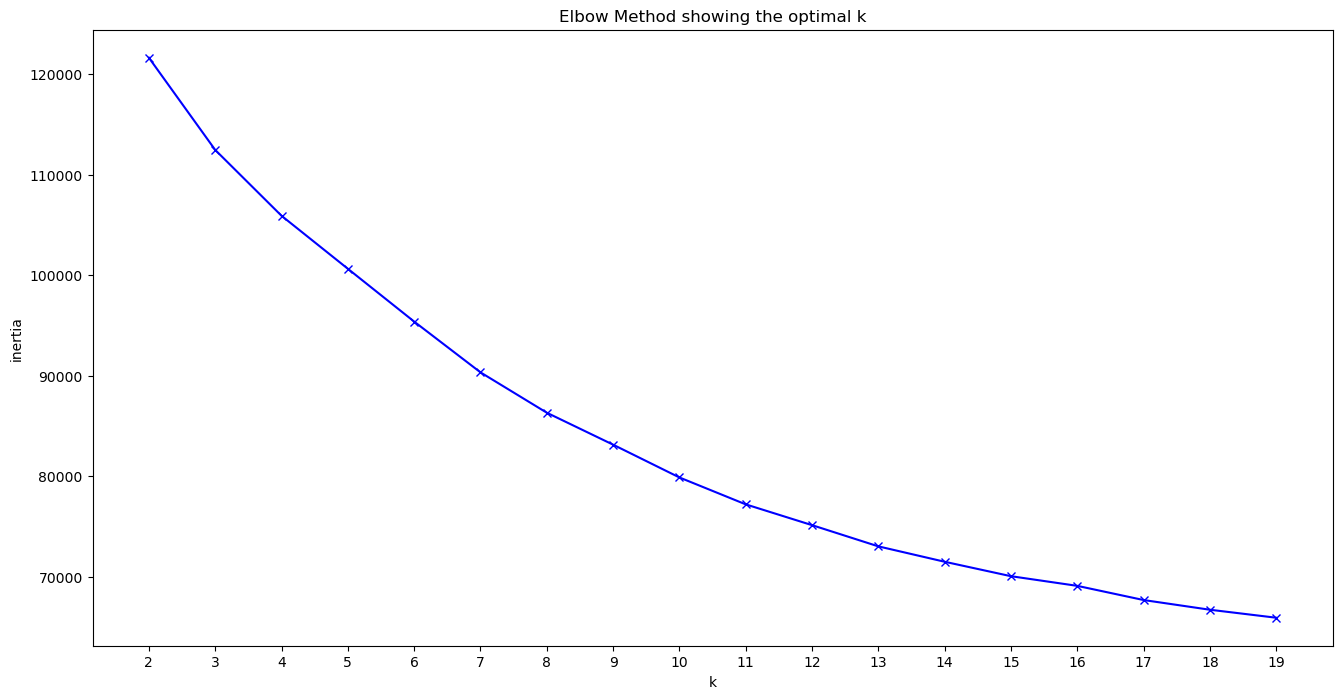

In [37]:
#Elbow graph of inertia
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_stan)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

C:\Users\Abel_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abel_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abel_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abel_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

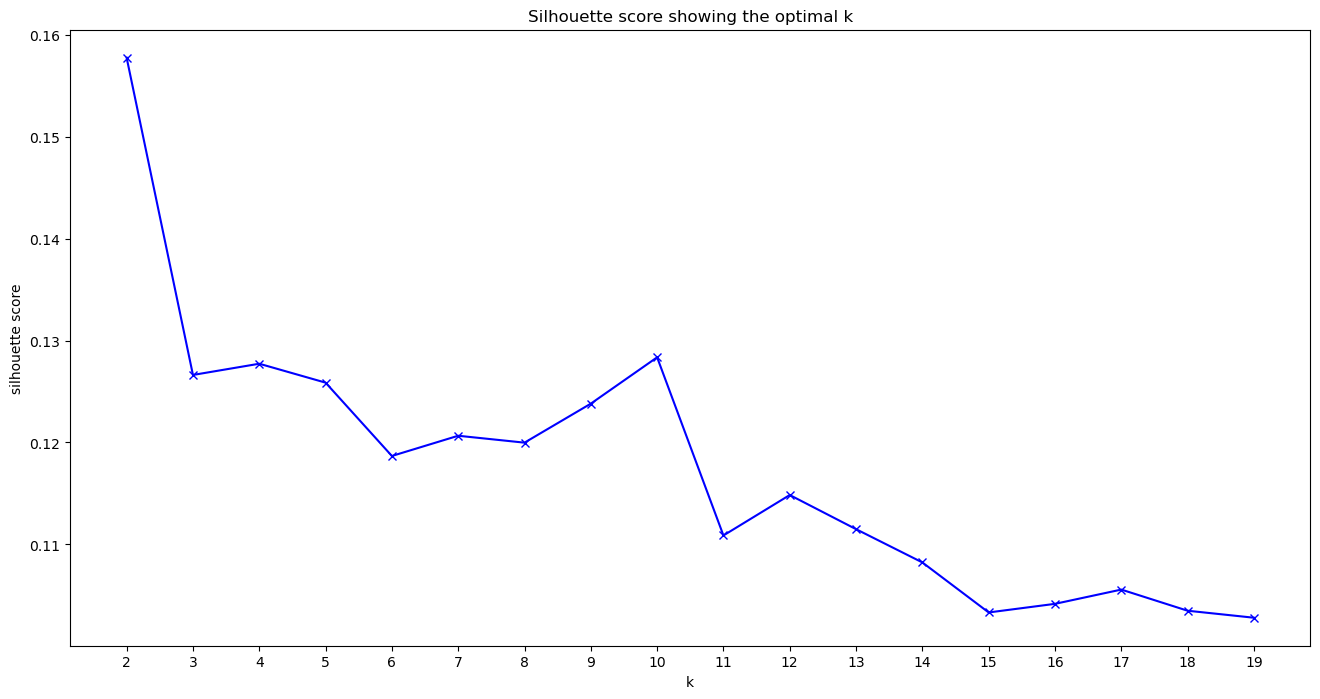

In [38]:
#silhouette score

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_stan)
    silhouette.append(silhouette_score(X_stan, kmeans.predict(X_stan)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

Clustering the songs

In [39]:
kmeans = KMeans(n_clusters=11).fit(X_stan) #despite not having a clear elbow I went for 11 clusters as it seemed a reasonable amount for the the number of available songs

C:\Users\Abel_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
kmeans.inertia_

77212.43018303

In [41]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_stan)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0      135
1     1093
2      790
3      401
4      889
5     1823
6     1529
7      482
8     1504
9      738
10    1591
Name: count, dtype: int64

In [42]:
features['cluster'] = clusters

In [43]:
features #with the cluster column at the end

song          artist  \
0                    Junk - Remastered 2011  Paul McCartney   
1                             Ordinary Pain   Stevie Wonder   
2                             I'm The Slime     Frank Zappa   
3                             I'm The Slime     The Mothers   
4      It's Alright, Ma (I'm Only Bleeding)       Bob Dylan   
...                                     ...             ...   
10970              Rock and Roll Night Club     Mac DeMarco   
10971                      Moving Like Mike     Mac DeMarco   
10972    Serve The Servants - 2023 Remaster         Nirvana   
10973  Scentless Apprentice - 2023 Remaster         Nirvana   
10974               Rape Me - 2023 Remaster         Nirvana   

                      song_id  danceability  energy   key  loudness  mode  \
0      2EnRJ8kjTFpEZZWwbTNKZM         0.712  0.0862   9.0   -17.696   1.0   
1      4vdIA5CJLRcL6qaUY2BUCd         0.653  0.6050  10.0   -10.326   0.0   
2      6PjgiuQUxxlAtoKGh6ofzC         0.388  0.6980   6.0   -12.709   0.0   
3      6PjgiuQUxxlAtoKGh6ofzC         0.388  0.6980   6.0   -12.709   0.0   
4      5Oer8yskMaCGXwGSfM7xr9         0.681  0.2570   4.0   -15.348   1.0   
...                       ...           ...     ...   ...       ...   ...   
10970  757WjJ59u2NZloiDZIMBvz         0.321  0.7140   7.0    -6.634   0.0   
10971  3gsk38xacWgtwr0yJz7aHp         0.460  0.7770   3.0    -6.273   0.0   
10972  4PvgxcCZxATeWt4vAZOISo         0.441  0.9390  10.0    -7.579   1.0   
10973  2nBW0vuSbiSGRpTm4SMc3Y         0.295  0.8560   1.0    -7.321   1.0   
10974  6LUVnYAspgzDQLWKhV1N7l         0.440  0.8670   8.0    -7.621   1.0   

       speechiness  acousticness  ...  valence    tempo            type  \
0           0.0325      0.814000  ...    0.315   90.666  audio_features   
1           0.0499      0.068100  ...    0.578   97.764  audio_features   
2           0.0739      0.002280  ...    0.833  173.004  audio_features   
3           0.0739      0.002280  ...    0.833  173.004  audio_features   
4           0.0695      0.597000  ...    0.566  115.867  audio_features   
...            ...           ...  ...      ...      ...             ...   
10970       0.0617      0.164000  ...    0.611  115.524  audio_features   
10971       0.1020      0.302000  ...    0.888  161.725  audio_features   
10972       0.0406      0.000011  ...    0.571  119.907  audio_features   
10973       0.0519      0.000002  ...    0.547  169.592  audio_features   
10974       0.0570      0.013300  ...    0.187  112.167  audio_features   

                           id                                   uri  \
0      2EnRJ8kjTFpEZZWwbTNKZM  spotify:track:2EnRJ8kjTFpEZZWwbTNKZM   
1      4vdIA5CJLRcL6qaUY2BUCd  spotify:track:4vdIA5CJLRcL6qaUY2BUCd   
2      6PjgiuQUxxlAtoKGh6ofzC  spotify:track:6PjgiuQUxxlAtoKGh6ofzC   
3      6PjgiuQUxxlAtoKGh6ofzC  spotify:track:6PjgiuQUxxlAtoKGh6ofzC   
4      5Oer8yskMaCGXwGSfM7xr9  spotify:track:5Oer8yskMaCGXwGSfM7xr9   
...                       ...                                   ...   
10970  757WjJ59u2NZloiDZIMBvz  spotify:track:757WjJ59u2NZloiDZIMBvz   
10971  3gsk38xacWgtwr0yJz7aHp  spotify:track:3gsk38xacWgtwr0yJz7aHp   
10972  4PvgxcCZxATeWt4vAZOISo  spotify:track:4PvgxcCZxATeWt4vAZOISo   
10973  2nBW0vuSbiSGRpTm4SMc3Y  spotify:track:2nBW0vuSbiSGRpTm4SMc3Y   
10974  6LUVnYAspgzDQLWKhV1N7l  spotify:track:6LUVnYAspgzDQLWKhV1N7l   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/2EnRJ8kjTFpE...   
1      https://api.spotify.com/v1/tracks/4vdIA5CJLRcL...   
2      https://api.spotify.com/v1/tracks/6PjgiuQUxxlA...   
3      https://api.spotify.com/v1/tracks/6PjgiuQUxxlA...   
4      https://api.spotify.com/v1/tracks/5Oer8yskMaCG...   
...                                                  ...   
10970  https://api.spotify.com/v1/tracks/757WjJ59u2NZ...   
10971  https://api.spotify.com/v1/tracks/3gsk38xacWgt...   
10972  https://api.spotify.com/v1/tracks/4PvgxcCZxATe...   
109

### 4. Music Recommendation System

In [44]:
# Combining the two top 100 charts with the hot songs information
combined_df = pd.concat([top100, billboard100], ignore_index=True)

# Saving the combined dataset to a CSV file
combined_df.to_csv('combined_df.csv', index=False)

In [45]:
# Create a lowercase version of the song titles to improve matching
combined_df['song_lower'] = combined_df['Song'].str.lower()


##### Run this cell to input your favorite song! ↓

In [46]:
# Get user input for a song
song = input("Enter the title of your favorite song: ").lower()

Enter the title of your favorite song: we will rock you


###### Run this cell to know if your song is hot or to get a spotify recommendation! ↓

In [47]:
# Checking if the song is in the top songs list
if combined_df['song_lower'].str.contains(song).any():
    # Recommend a random song from the top songs list
    random_song = combined_df.sample()
    print(f"Yay, hot song! Here is another one for you: \n\n{random_song.iloc[0]['Song']} - {random_song.iloc[0]['Artist']}")
else:
    result = sp.search(q=song, limit=1)  # Search for the song on Spotify
    if result['tracks']['items']:
        # Get the audio features of the song
        new_song_features = sp.audio_features(result['tracks']['items'][0]['uri'])[0]
        if new_song_features:
            new_song_df = pd.DataFrame([new_song_features])

            # Drop irrelevant columns only if they exist in the DataFrame
            columns_to_drop = ['type', 'id', 'uri', 'track_href', 'analysis_url']
            for col in columns_to_drop:
                if col in new_song_df.columns:
                    new_song_df.drop(columns=col, inplace=True)

           #Transformer and cluster of the new song
            X_stan_new = transformer.transform(new_song_df)
            new_song_cluster = kmeans.predict(X_stan_new)[0]

            # Find songs in the same cluster
            possible_songs = features[features['cluster'] == new_song_cluster].reset_index()
            if not possible_songs.empty:
                random_recommendation = possible_songs.sample()
                print(f"You should try {random_recommendation.iloc[0]['song']} by {random_recommendation.iloc[0]['artist']}")
            else:
                print("No similar songs found in the current top list.")
        else:
            print("Sorry, we couldn't find the audio features for that song on Spotify.")
    else:
        print("Sorry, we couldn't find that song on Spotify.")

You should try Gotta Broken Heart Again by Prince


###### Check your recomendations's features Spotify ID and much more! ;)

In [53]:
result = sp.search(q=random_recommendation, limit=1)
new_song_features = sp.audio_features(result['tracks']['items'][0]['uri'])[0]
new_song_df = pd.DataFrame([new_song_features])
new_song_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.624   0.283    2   -12.687     1       0.0278         0.887   

   instrumentalness  liveness  valence   tempo            type  \
0           0.00461    0.0867    0.227  101.89  audio_features   

                       id                                   uri  \
0  6w8NOOj4f8FhF6346a7Ulx  spotify:track:6w8NOOj4f8FhF6346a7Ulx   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/6w8NOOj4f8Fh...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/6w8N...       283267   

   time_signature  
0               4